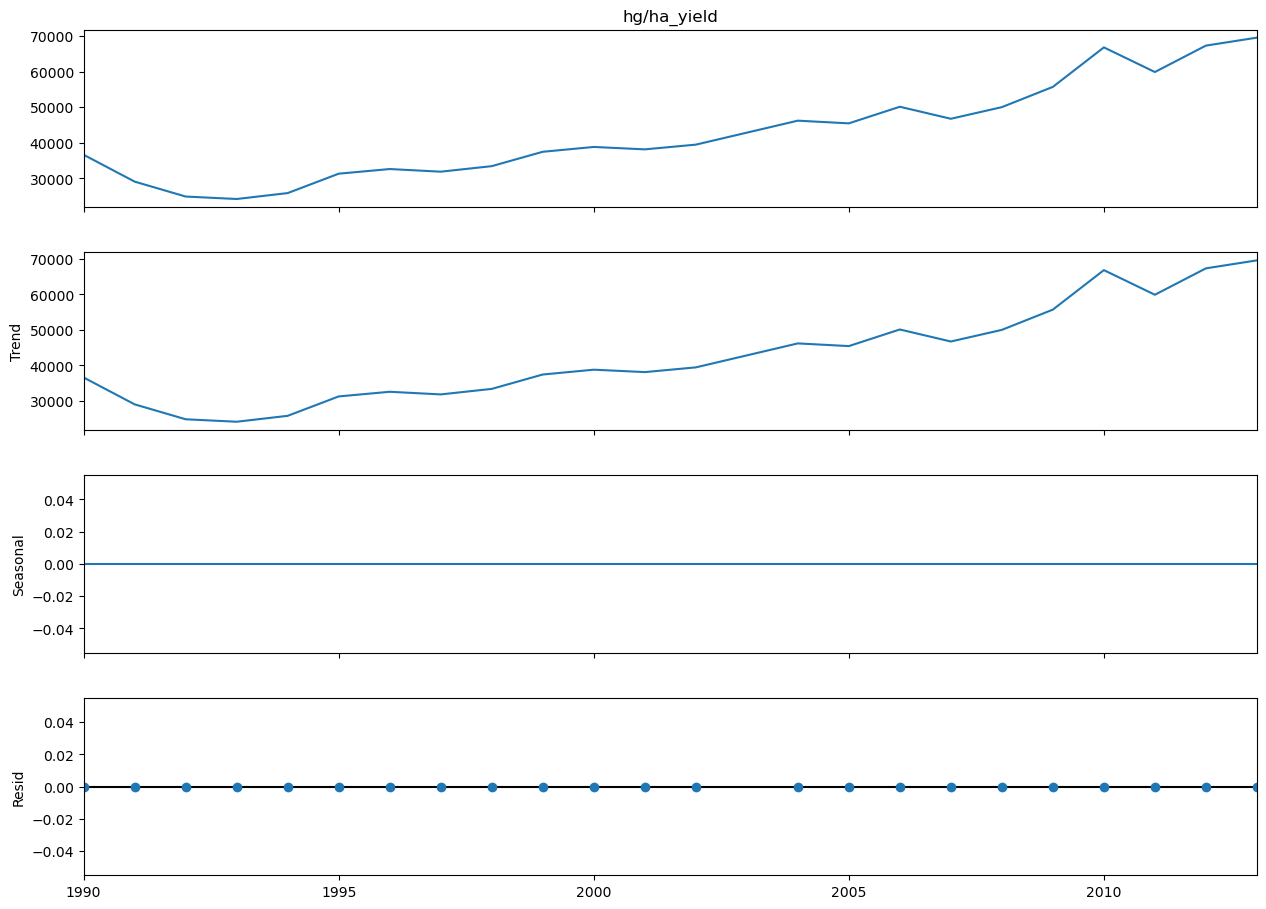

C:\Users\rutuj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutuj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutuj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutuj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rutuj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:            hg/ha_yield   No. Observations:                   18
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -161.323
Date:                Mon, 22 Jul 2024   AIC                            328.646
Time:                        13:11:01   BIC                            331.146
Sample:                             0   HQIC                           328.895
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1692      0.580      0.292      0.771      -0.968       1.306
ma.L1         -0.3682      0.486     -0.757      0.449      -1.321       0.585
sigma2      1.058e+07   4.32e+06      2.451      0.0

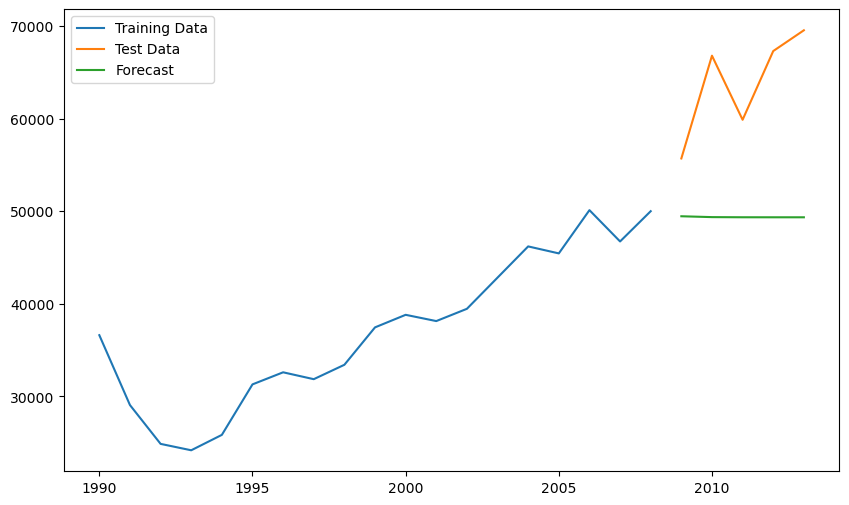

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('yield_df.csv')

# Filter the data for Maize in Albania
filtered_data = data[(data['Area'] == 'Albania') & (data['Item'] == 'Maize')]

# Drop unnecessary columns and reset index
filtered_data = filtered_data[['Year', 'hg/ha_yield']]
filtered_data = filtered_data.set_index('Year')

# Decompose the time series
decomposition = seasonal_decompose(filtered_data['hg/ha_yield'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

# Split the data into training and test sets
# The last 5 data points are used for testing, and the remaining data is used for training.
train_data = filtered_data[:-5]
test_data = filtered_data[-5:]

# Fit the ARIMA model
model = ARIMA(train_data['hg/ha_yield'], order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future yields
forecast = model_fit.forecast(steps=5)
forecast.index = test_data.index

# Evaluate the model
mse = mean_squared_error(test_data['hg/ha_yield'], forecast)
print(f'Mean Squared Error: {mse}')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()
